(80, 899)


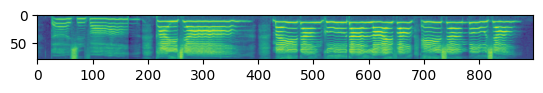

In [2]:
import numpy as np

with open('data/testing_mel/001.npy','rb') as f:
    mel = np.load(f)

print(mel.shape)

from matplotlib import pyplot as plt
plt.imshow(np.log(mel))
plt.show()

In [6]:
import os
from tqdm import tqdm
from Melspectrogram import mel_spectrogram, load_audio, to_mono

num_mels=80
n_fft=1024
hop_size=256
win_size=1024
sampling_rate=22050
fmin=0
fmax=8000

parent_path = '/home/jack/Code/HW/NTU-DLMAG-HW-2023Fall/HW2/data/m4singer'
all_audio_path = [os.path.join(parent_path,i) for i in os.listdir(parent_path)]

for load_audio_path in tqdm(all_audio_path):
    if not os.path.isdir(load_audio_path):
        continue
    audio_list = os.listdir(load_audio_path)
    audio_list.sort()
    for audio in audio_list:
        if audio[-3:] != 'wav':
            continue
        # print(load_audio_path, audio)
        y = load_audio(os.path.join(load_audio_path, audio), sr=sampling_rate)
        mel_tensor = mel_spectrogram(y, n_fft, num_mels, sampling_rate, hop_size, win_size, fmin, fmax)
        mel = mel_tensor.squeeze().cpu().numpy()
        file_name = os.path.join(load_audio_path, audio[:-4]+'.npy')
        np.save(file_name, mel)
        mel = np.load(file_name) # check the .npy is readable

100%|██████████| 661/661 [01:21<00:00,  8.11it/s]


# Griffin Lim

In [43]:
import librosa
from IPython.display import Audio, display
audio_path = '/home/jack/Code/HW/NTU-DLMAG-HW-2023Fall/HW2/data/m4singer_valid/Alto-3#修炼爱情/0005'

In [44]:
y,sr = librosa.load(audio_path+'.wav')
# Get the magnitude spectrogram
S = np.abs(librosa.stft(y))
# Invert using Griffin-Lim
y_inv = librosa.griffinlim(S)
# Invert without estimating phase
y_istft = librosa.istft(S)

display(Audio(y,rate=sr))
display(Audio(y_inv,rate=sr))
display(Audio(y_istft,rate=sr))

Text(0.5, 1.0, 'Magnitude-only istft reconstruction')

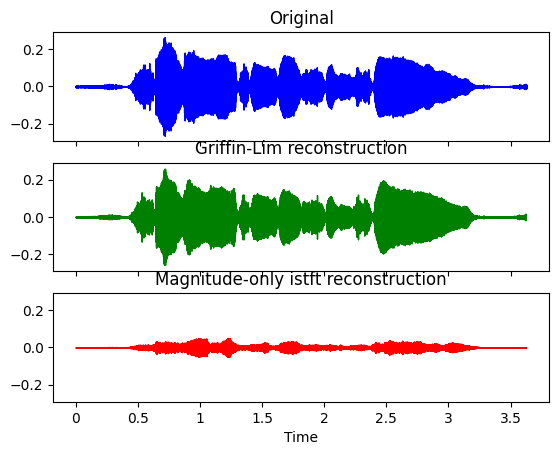

In [45]:
import matplotlib.pyplot as plt
sr = 22050
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
librosa.display.waveshow(y, sr=sr, color='b', ax=ax[0])
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
librosa.display.waveshow(y_inv, sr=sr, color='g', ax=ax[1])
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
librosa.display.waveshow(y_istft, sr=sr, color='r', ax=ax[2])
ax[2].set_title('Magnitude-only istft reconstruction')

In [46]:
num_mels=80
n_fft=1024
hop_size=256
win_size=1024
sampling_rate=22050
fmin=0
fmax=8000


In [51]:
with open(audio_path+'.npy','rb') as f:
    S = np.load(f)
print(S.shape)

y_stft = librosa.feature.inverse.mel_to_stft(S, sr=sr, n_fft=n_fft, power=2)
y_inv = librosa.griffinlim(y_stft, n_iter=32, hop_length=hop_size, win_length=win_size, n_fft=n_fft)

display(Audio(y,rate=sr))
display(Audio(y_inv,rate=sr))

(80, 312)
